# ASHWIN SURESH (21MIS1174)

# First we will load the file to the variable filepath and supress any kind of warnings that pop up...

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Loading File
filepath ='C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/Iris_Data.csv'

# Using pandas library it enables us to read the csv file and store as a dataframe...

In [2]:
data=pd.read_csv(filepath)

# Displaying first 5 records of the dataframe...

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# To check whether there are any null or empty values in the dataset, since none we proceed further without disturbing the dataset...

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# To verify the datatypes of the dataset, as only numerical values shall be used...

In [5]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# We first select the features required and since we have just 4, initially for computation we consider all the 4 features. and alongside we have the target column which is also to be included in a separate array...

In [6]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']]
y = data.species

# We will do the Feature Scaling through Standardization process as a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1, which leads to biased results. Transforming the data to comparable scales prevents this problem...

In [7]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# The classic approach to PCA is to calculate the covariance matrix (M), which is a matrix where each element is scaled along with its corresponding mean and multiplication with its transpose... 

In [8]:
import numpy as np

X_mean = np.mean(X, axis=0)
# cov_mat = np.cov(X)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


# Next we are to calculate eigenvectors and eigenvalues. Eigenvalues (λ) is calculated based on |M - λ| = 0. Similarly, eigenvectors are calculated based on MX = λX, where X represents eigenvector, the values are thus called prinicpal values which will be used to plot the scattered plot of target classes...

In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


# The goal of PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped...

In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893148
0.9274036215173416
0.1483422264816399
0.02074601399559592


# Based on the initial set of feature values resultantly projection matrix is formed and now we have the provision of either following and plotting based on calculation done thus far or scikit-learn module...

In [11]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix :\n', matrix_w)

Matrix :
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [12]:
X.dot(matrix_w)

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

# Projection Matrix is a matrix of concatenated top k eigenvectors. Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature space, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our 2-dimensional eigenvector matrix...

In [13]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

Y_sklearn

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

# Visualizing the scattered plot based on Principal Component 1 and 2 on X and Y-axis respectively based on Scikit-learn

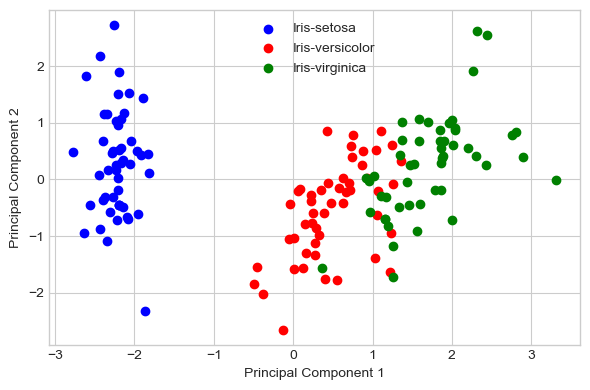

In [15]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

# Final Interpretation 

The Iris petal dataset which contains 150 rows and 5 columns is used for Principal Component Axes algorithm. The dataset is not used as a whole and only specific features are interlinked to the target values. Since no empty or null values are present in the dataset, we begin to do feature scaling to reduce large values v smaller values gap. We go onto calculate Covariance matrix, eigenvalues and eigenvectors separately. But using PCA module part of sklearn.decomposition we can directly reach the principal components rather than long calculations. Based on visualization we come to the conclusion that instead of 4 dimensional representation we have just transformed 2 of the dimensions into a single plane for better visualization. Thus, for a small dataset PCA algorithm is best suited for classification and graphical representation.